In [45]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns



Read Data

In [46]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Dataset is clear, so we can continue

In [48]:
CompanyName = data['CarName'].apply(lambda x: x.split(' ')[0])

data.insert(3, 'CompanyName', CompanyName)

data.drop(['CarName'], axis=1, inplace=True)

data.drop(['car_ID'], axis=1, inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
def get_variable_type(element):
    if element==0:
        return "Not Known"
    elif element < 10 and element!=0 :
        return "Categorical"
    elif element >= 10:
        return "Contineous"

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Valeurs_Uniques_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe):
    metadata_matrix = pd.DataFrame({
        'Datatype': dataframe.dtypes.astype(str),
        'Non_Null_Count': dataframe.count(axis=0).astype(int),
        'Null_Count': dataframe.isnull().sum().astype(int),
        'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100,
        'Valeurs_Uniques_Count': dataframe.nunique().astype(int)
    })

    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def list_potential_categorical_type(dataframe, data):
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    
    length = len(metadata_matrix_categorical)
    if length == 0:
        print('Everything is ok')
    else:
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype", "Valeurs_Uniques_Count"])
        metadata_matrix_categorical.sort_values(["Valeurs_Uniques_Count"], axis=0, ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        
        for name in col_to_check :
            name_list.append(name)
            values_list.append(data[name].unique())
        
        temp = pd.DataFrame({"index":name_list, "Valeurs_Uniques": values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp, how='inner', on='index')
        display(metadata_matrix_categorical.set_index("index"))

In [50]:
metadata = get_meta_data(data)
list_potential_categorical_type(metadata, data)

,Datatype,Valeurs_Uniques_Count,Valeurs_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


In [51]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [52]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [53]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

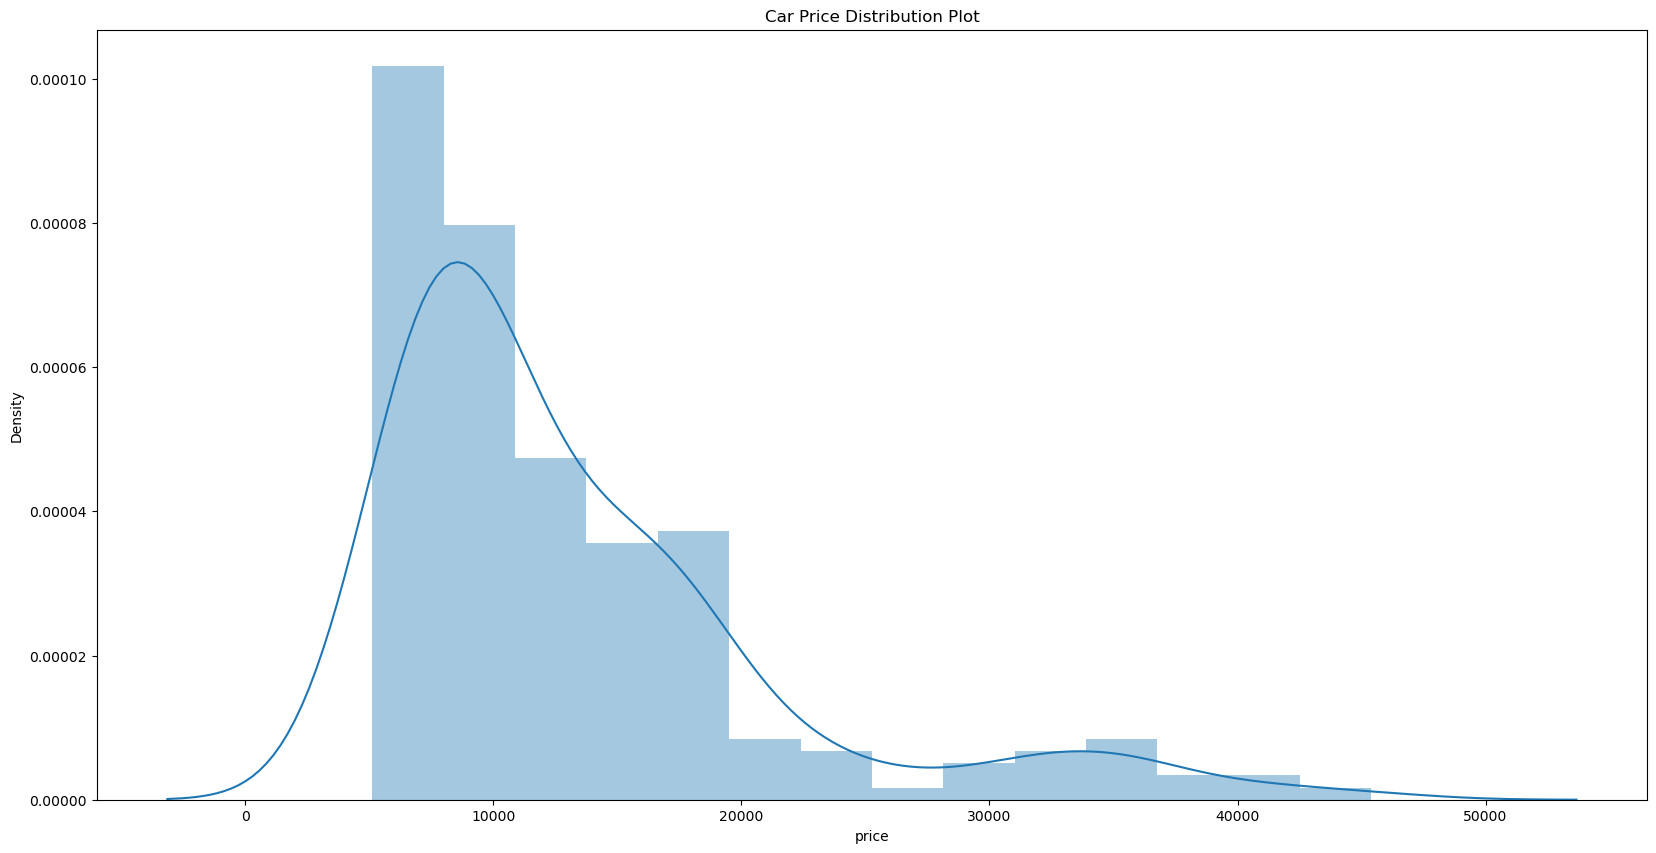

In [54]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

In [55]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


Data preporation

In [56]:
metadata_matrix_dataframe = get_meta_data(data)
list_potential_categorical_type(metadata_matrix_dataframe,data)

,Datatype,Valeurs_Uniques_Count,Valeurs_Uniques
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


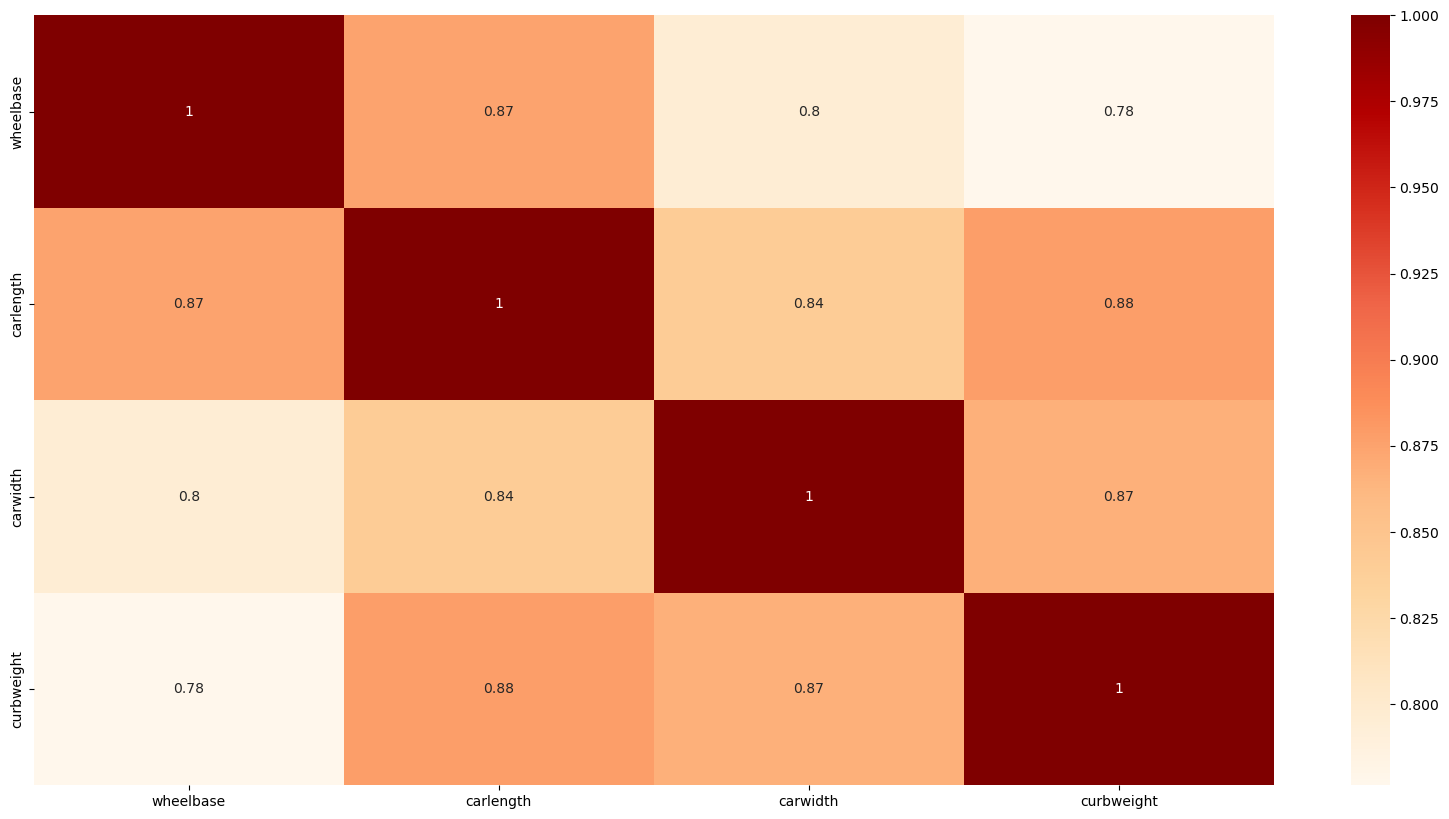

In [57]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

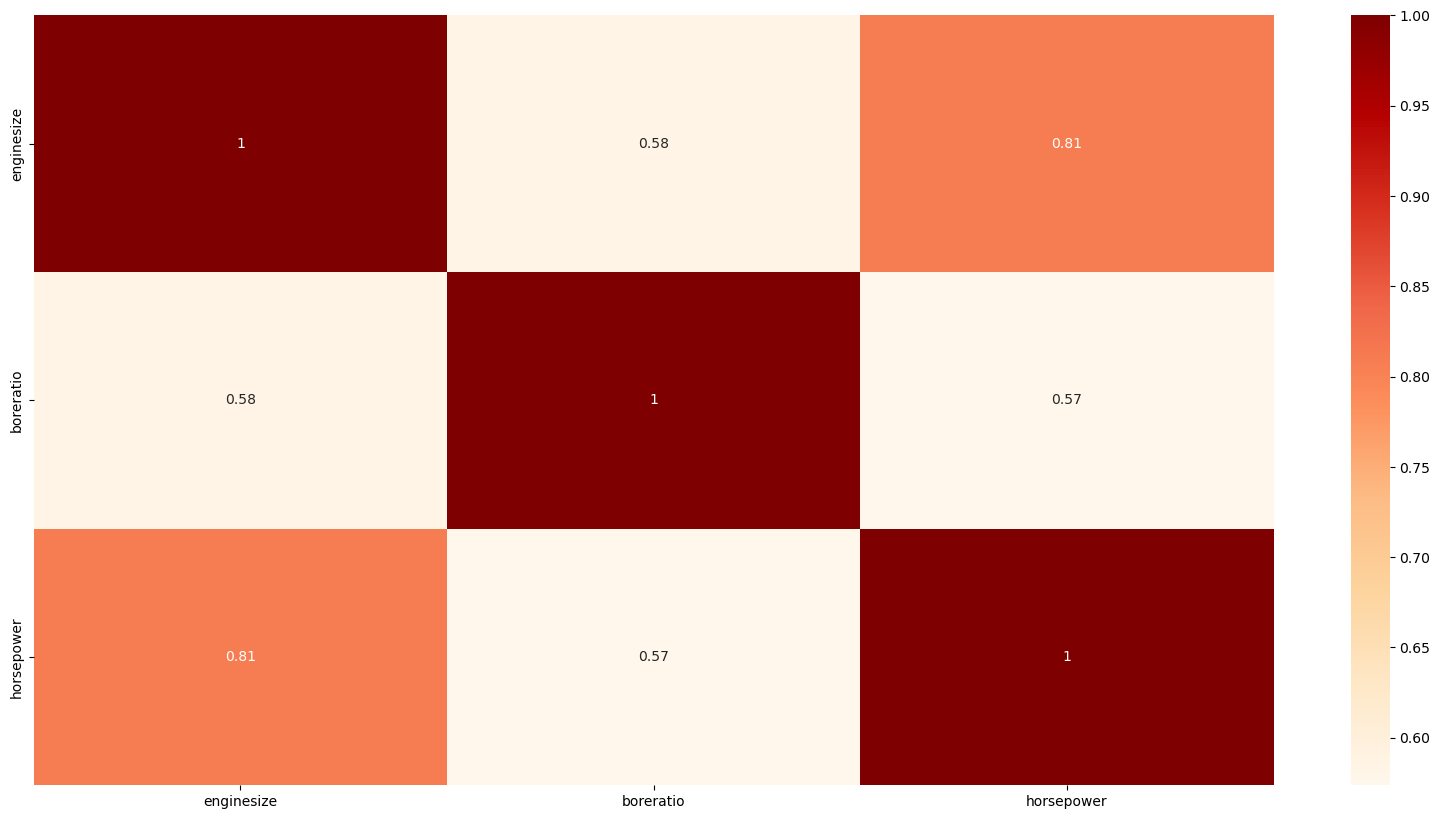

In [58]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(10,10,data.filter(performance_col_list))

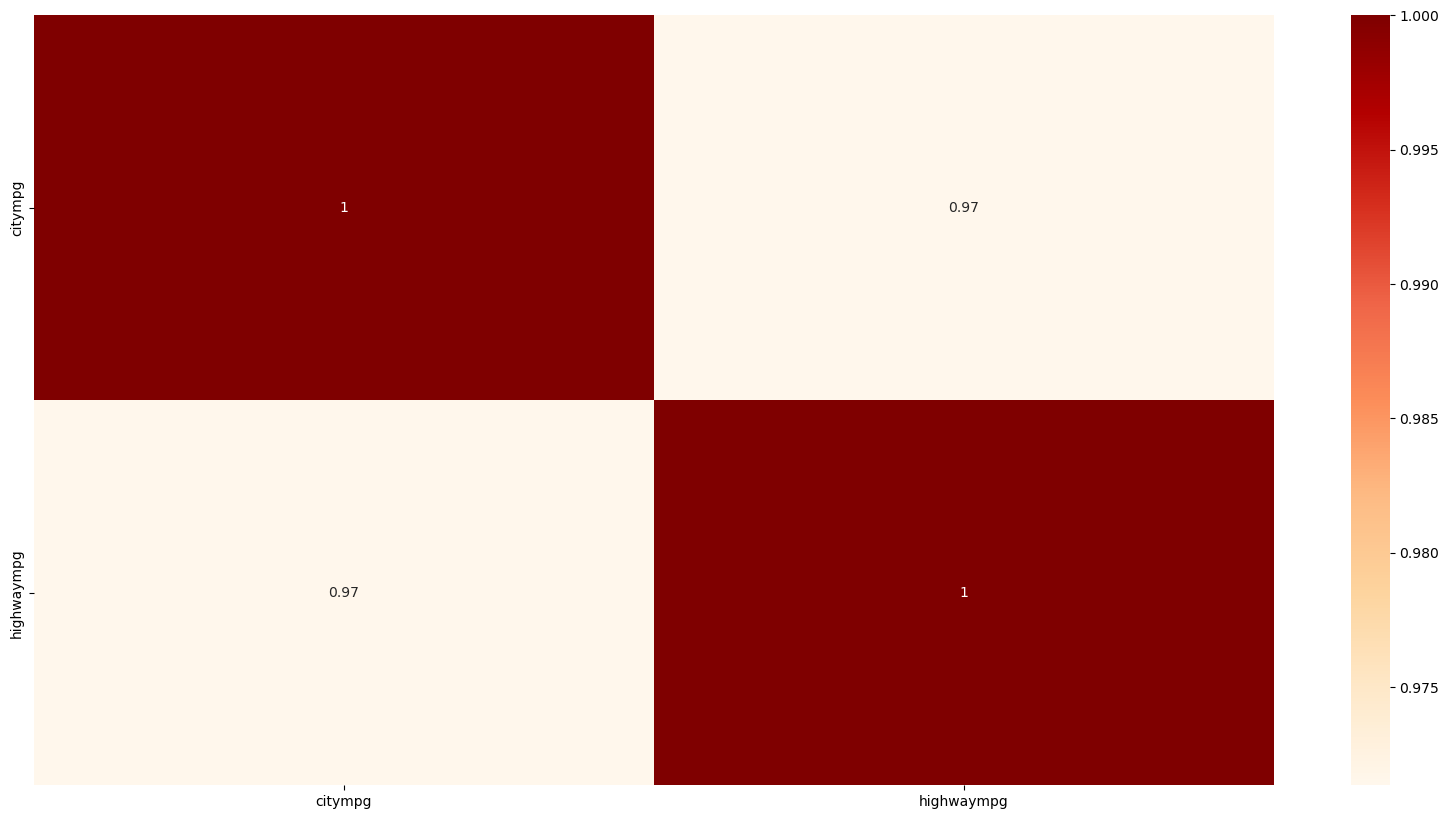

In [59]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

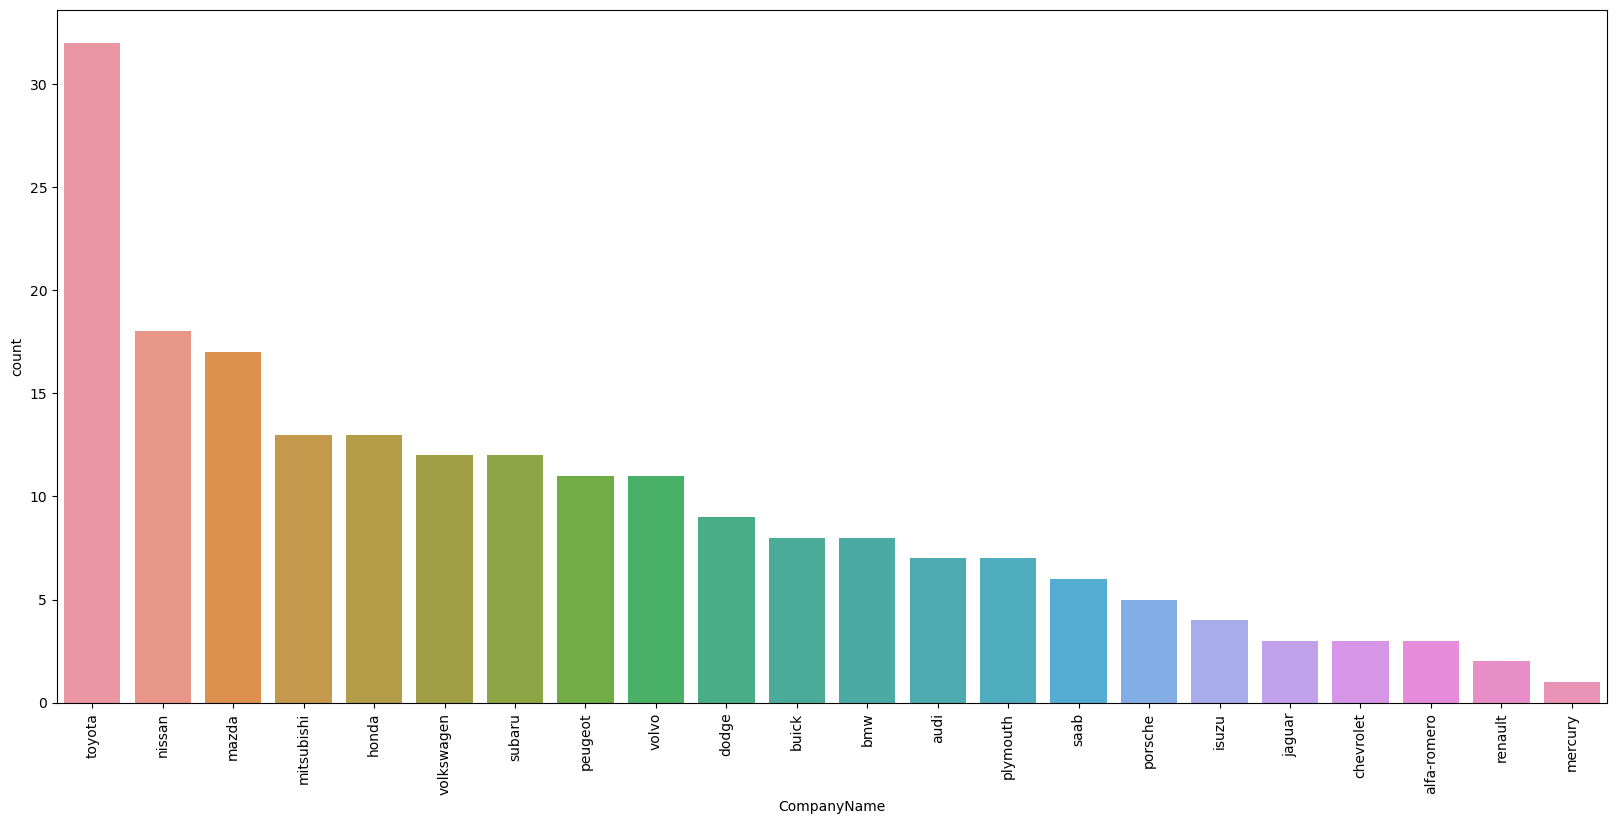

In [60]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

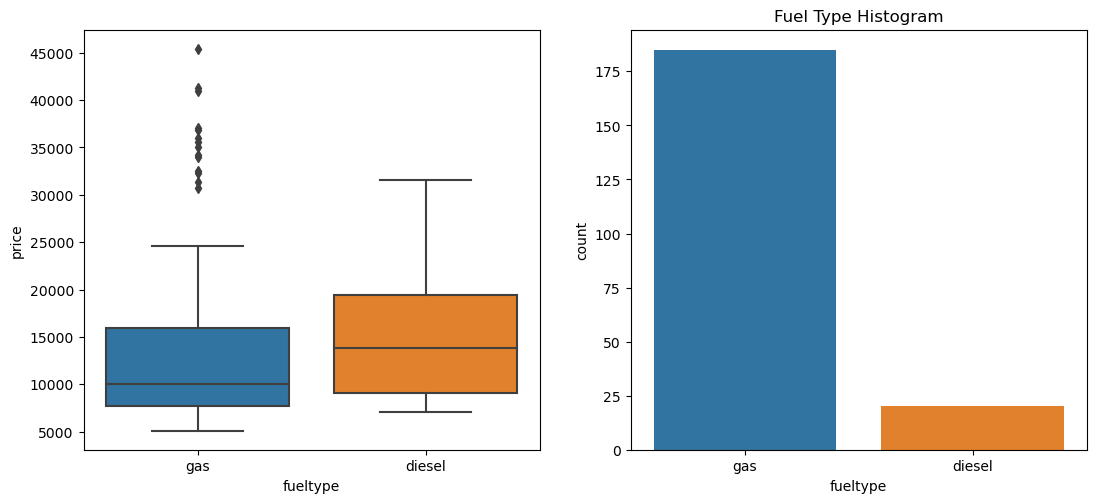

In [61]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

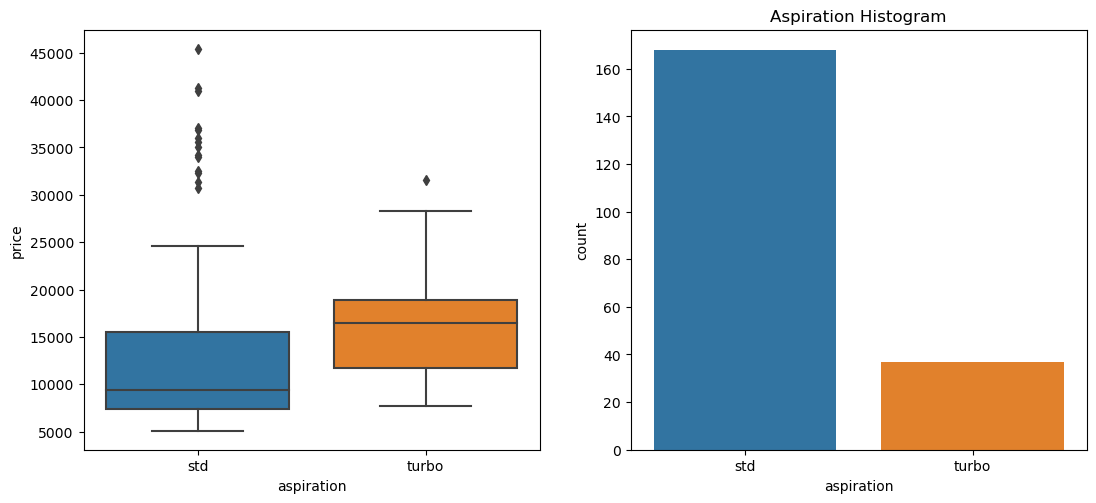

In [62]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

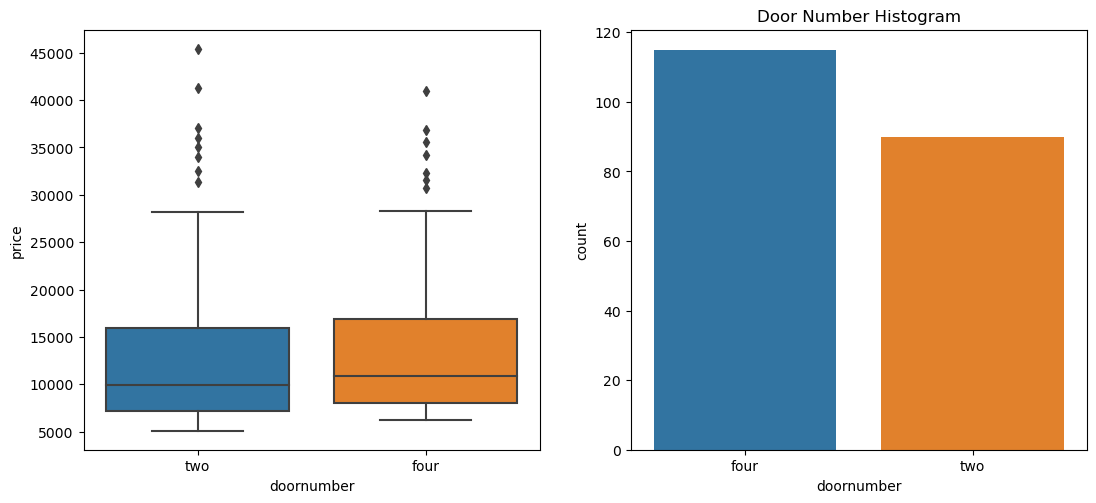

In [63]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

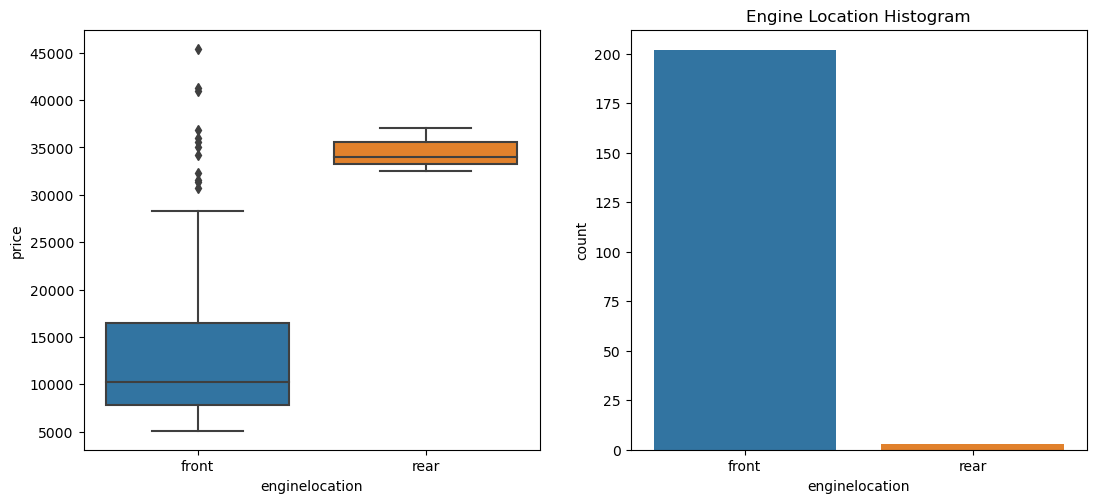

In [64]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

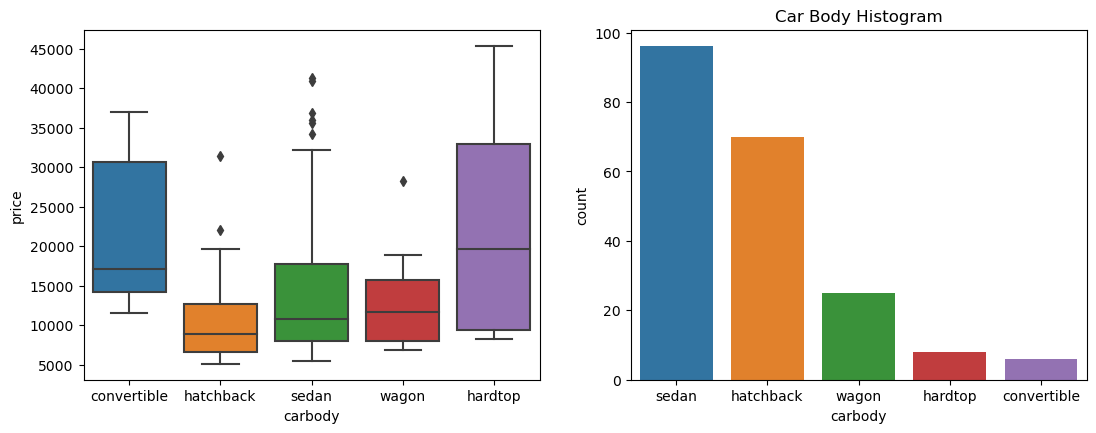

In [65]:
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

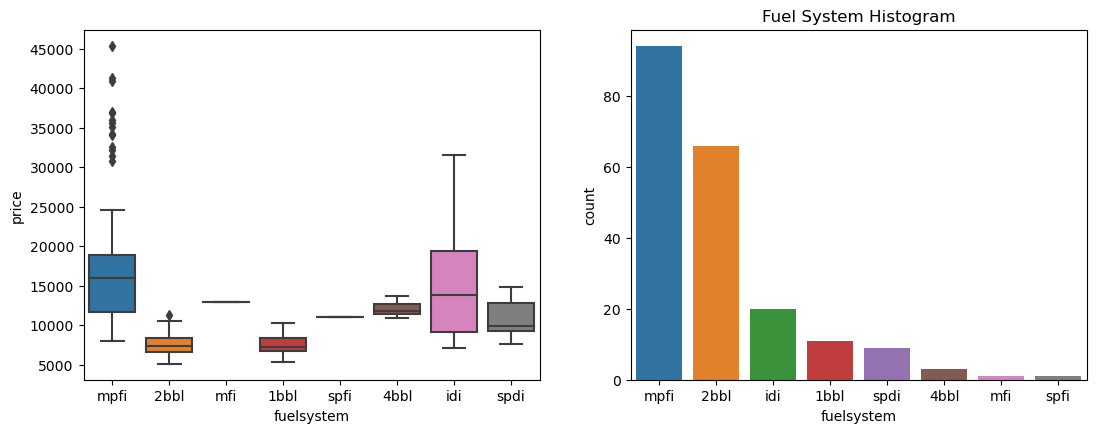

In [66]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)

plt.show()

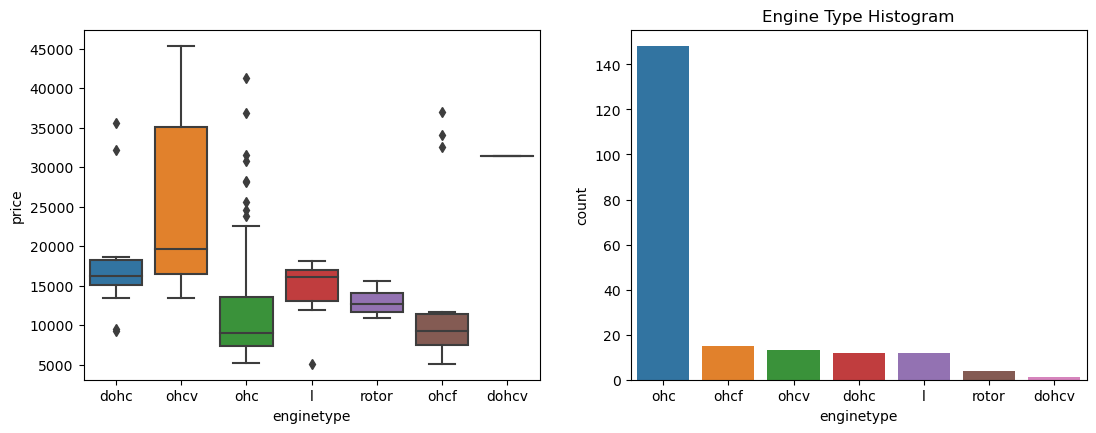

In [67]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)

plt.show()

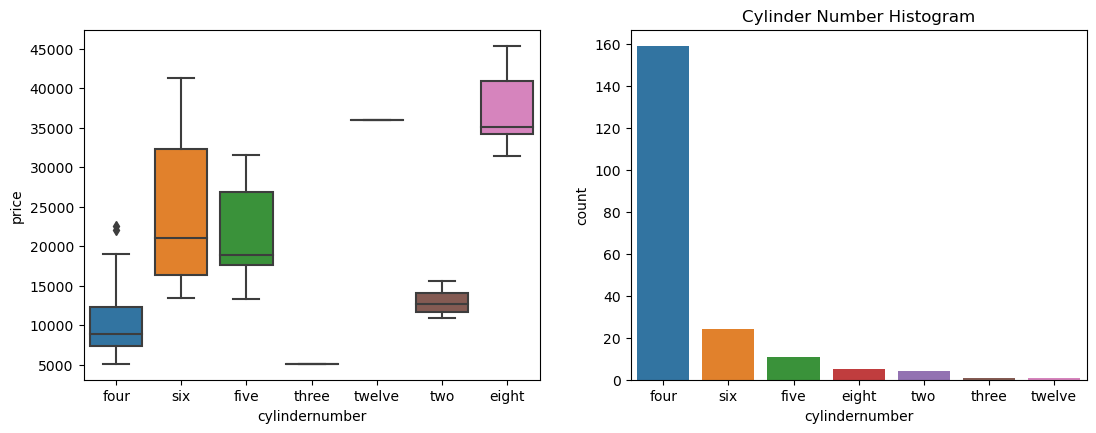

In [68]:
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)

plt.show()

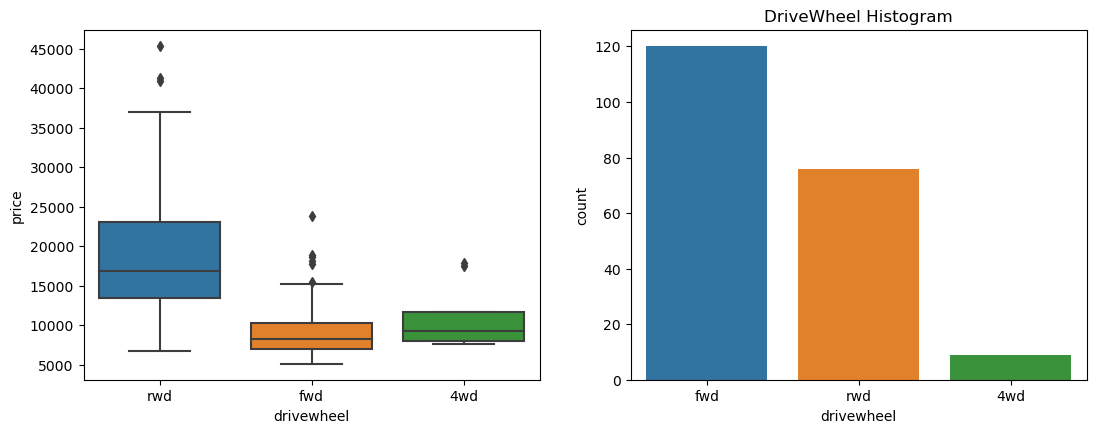

In [69]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)

plt.show()

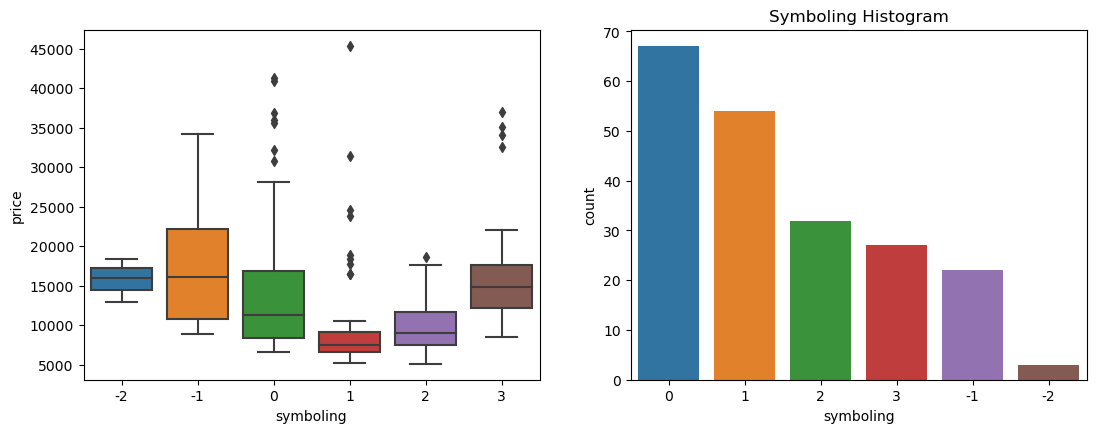

In [70]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)

plt.show()

### На основании проведенного анализа, можно заметить, что некоторые данные не коррелируют со значением "Price", соответственно, мы можем исключить их из дальнейшего рассмотрения.

In [71]:
data = data.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'highwaympg', 'fuelsystem', 'boreratio'], axis=1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,111,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,111,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,154,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,102,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,115,18,17450.0


In [72]:
print("Все поля, которые пользователь должен ввести (варианты ввода нужно смотреть в базе данных)\n", data.columns)

Все поля, которые пользователь должен ввести (варианты ввода нужно смотреть в базе данных)
 Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'enginetype',
       'cylindernumber', 'horsepower', 'citympg', 'price'],
      dtype='object')


In [73]:
def binary_dummy_replace(x):
    return x.map({
        'gas': 1, 'diesel': 0,
        'std': 1, 'turbo': 0,
        'two': 1, 'four': 0,
        'front': 1, 'rear': 0
    })

def dummies(x, df):
    template = pd.get_dummies(df[x], prefix=x, drop_first=True)

    df = pd.concat([df, template], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [74]:
data = dummies('symboling', data)
data = dummies('CompanyName', data)
data = dummies('fueltype', data)
data = dummies('aspiration', data)
data = dummies('doornumber', data)
data = dummies('carbody', data)
data = dummies('drivewheel', data)
data = dummies('enginelocation', data)
data = dummies('enginetype', data)
data = dummies('cylindernumber', data)


In [75]:
data *= 1
data['price'] *= 40 # переводим цены по курсу 
data.head()

,wheelbase,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,111,21,539800.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,88.6,111,21,660000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,94.5,154,19,660000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,99.8,102,24,558000.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,99.4,115,18,698000.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [76]:
from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(data, train_size=0.75, test_size=0.25)

In [90]:
cars_test

,wheelbase,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
23,93.7,102,24,318280.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
176,102.4,92,27,435920.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
65,104.9,120,19,731200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
162,95.7,70,28,370320.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
196,104.3,114,24,639400.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
109,114.2,97,19,497600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
71,115.6,155,16,1367360.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
85,96.3,88,25,279560.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
11,101.2,101,23,677000.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
6,105.8,110,19,708400.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [78]:
# from sklearn.preprocessing import StandardScaler, scale

# sc = StandardScaler()

# col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

# cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
# cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

# cars_train.head()

In [79]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

In [80]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

In [81]:
len(y_test)

52

In [82]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()

y_pred = lm.predict(X_test)


In [83]:
y_pred

23     3.533921e+05
176    3.847102e+05
65     5.707146e+05
162    2.827861e+05
196    5.867181e+05
109    6.153696e+05
71     1.596317e+06
85     3.501911e+05
11     8.012526e+05
6      7.153829e+05
60     3.830329e+05
88     3.852284e+05
16     1.147743e+06
132    6.420844e+05
76     1.905257e+05
184    3.400743e+05
159    3.207757e+05
175    3.978658e+05
30     1.198435e+05
12     9.404614e+05
66     4.937091e+05
112    6.322858e+05
81     3.307841e+05
153    2.323847e+05
194    5.889037e+05
156    2.784150e+05
107    5.774324e+05
84     4.969972e+05
72     1.644991e+06
123    3.514782e+05
133    6.322590e+05
47     1.422000e+06
165    3.274147e+05
188    4.148943e+05
139    2.464224e+05
127    1.302114e+06
160    2.609304e+05
116    6.322858e+05
145    4.590940e+05
102    6.313793e+05
200    7.169438e+05
8      7.991888e+05
198    7.330527e+05
39     3.687994e+05
46     3.969845e+05
186    3.697080e+05
57     4.792487e+05
193    3.962697e+05
93     2.830401e+05
40     3.687994e+05


In [84]:
resid = y_test - y_pred.to_frame('price')

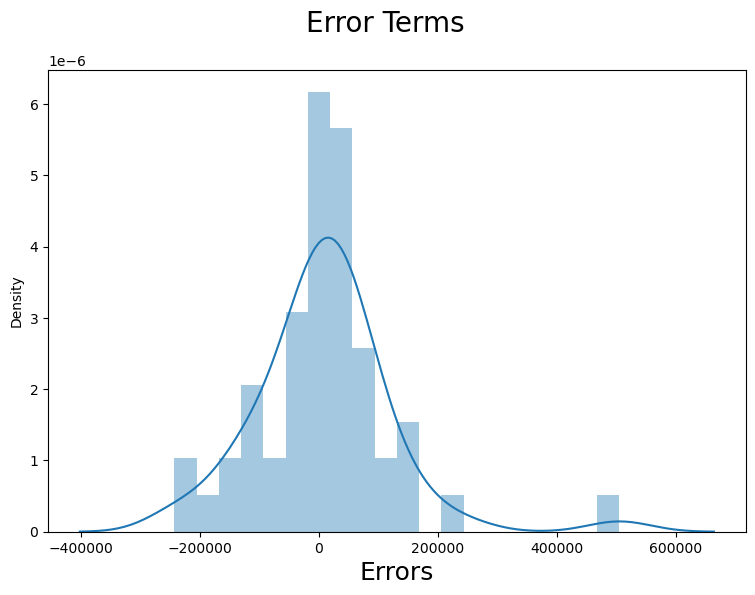

In [85]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

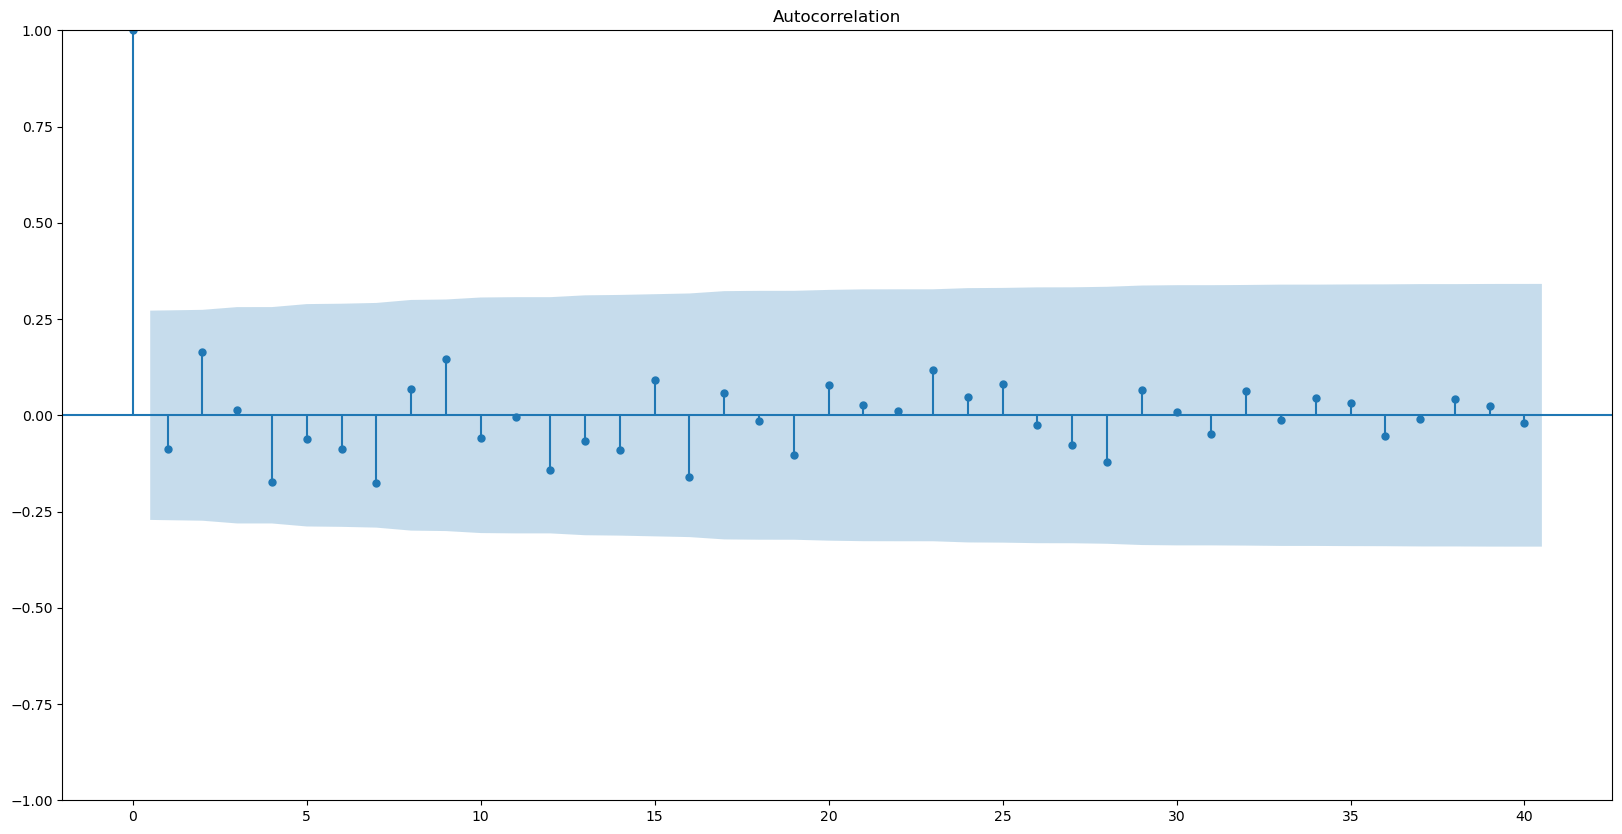

In [86]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

In [87]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8722991868209313

In [88]:
''' это коэфициенты, на которые мы должны умножать уже отформатированные данные '''
params = lm.params
print(params)

wheelbase                   9340.975823
horsepower                  2866.717776
citympg                    -2185.564482
symboling_-1               83203.429315
symboling_0               109117.224196
symboling_1               132805.341749
symboling_2               103572.865488
symboling_3               135983.627786
CompanyName_audi           48300.848966
CompanyName_bmw           261509.460151
CompanyName_buick         350417.678323
CompanyName_chevrolet     -86457.291051
CompanyName_dodge         -99309.922221
CompanyName_honda         -63097.169403
CompanyName_isuzu         -32336.423896
CompanyName_jaguar        495384.426216
CompanyName_mazda         -66799.982976
CompanyName_mercury      -109050.004204
CompanyName_mitsubishi   -113629.906729
CompanyName_nissan        -75475.195834
CompanyName_peugeot       133341.846769
CompanyName_plymouth     -109402.335542
CompanyName_porsche       270135.911120
CompanyName_renault       -40048.951814
CompanyName_saab           99705.643001


In [89]:
# можно создать два вектора (один - координаты, другой - веса) и скалярно перемножить
# их - получим как раз искомый ответ


Что еще нужно сделать?

1. Нужно, что бы при вводе данных, они преобразовывались в нужный для модели вид
2. И соответсвенно форма, куда эти данные должны вводиться
3. Мащины должны быть только из списка, на котором тренеровалась модель

def binary_dummy_replace(x):
    return x.map({
        'gas': 1, 'diesel': 0,
        'std': 1, 'turbo': 0,
        'two': 1, 'four': 0,
        'front': 1, 'rear': 0
    })

def dummies(x, df):
    template = pd.get_dummies(df[x], prefix=x, drop_first=True)

    df = pd.concat([df, template], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

data = dummies('symboling', data)
data = dummies('CompanyName', data)
data = dummies('fueltype', data)
data = dummies('aspiration', data)
data = dummies('doornumber', data)
data = dummies('carbody', data)
data = dummies('drivewheel', data)
data = dummies('enginelocation', data)
data = dummies('enginetype', data)
data = dummies('cylindernumber', data)


data *= 1
data.head()